In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
seoul_bike_sharing_demand = fetch_ucirepo(id=560) 
  
# data (as pandas dataframes) 
X = seoul_bike_sharing_demand.data.features 
y = seoul_bike_sharing_demand.data.targets 
  
# metadata 
print(seoul_bike_sharing_demand.metadata) 
  
# variable information 
print(seoul_bike_sharing_demand.variables) 


{'uci_id': 560, 'name': 'Seoul Bike Sharing Demand', 'repository_url': 'https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand', 'data_url': 'https://archive.ics.uci.edu/static/public/560/data.csv', 'abstract': 'The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 8760, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Functioning Day'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5F62R', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and a

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import copy
from sklearn.linear_model import LinearRegression

In [3]:
dataset_cols = ['bike_count','hour','temp','humidity','wind','visibility','dew_pt_temp','radiation','rain','snow','functional']
df = pd.concat([X, y], axis=1).drop(['Date','Holiday','Seasons'],axis=1)
df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [6]:
df.colums = dataset_cols
df['Functioning Day'] = (df['Functioning Day'] =='Yes').astype(int)
df = df[df['Hour'] == 12]
df = df.drop(['Hour'],axis =1)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [7]:
df.head()

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Functioning Day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,0
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,0
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,0
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,0
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,0


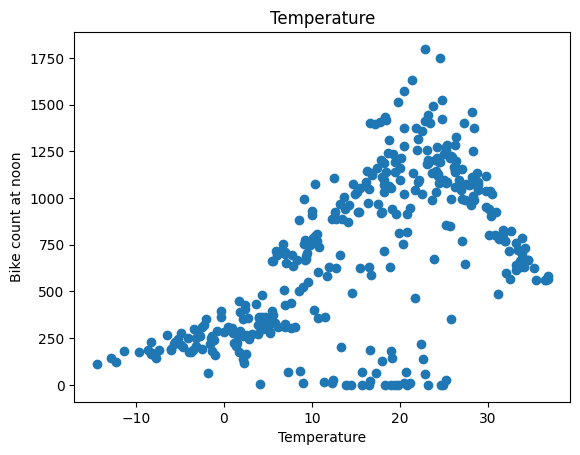

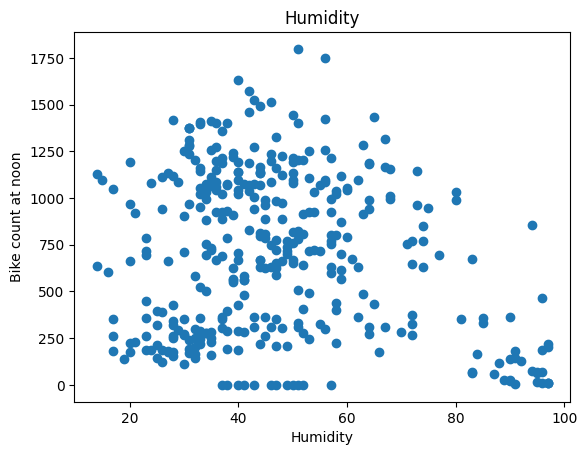

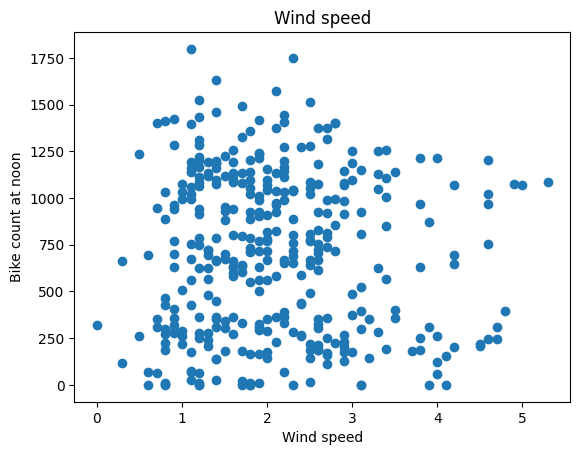

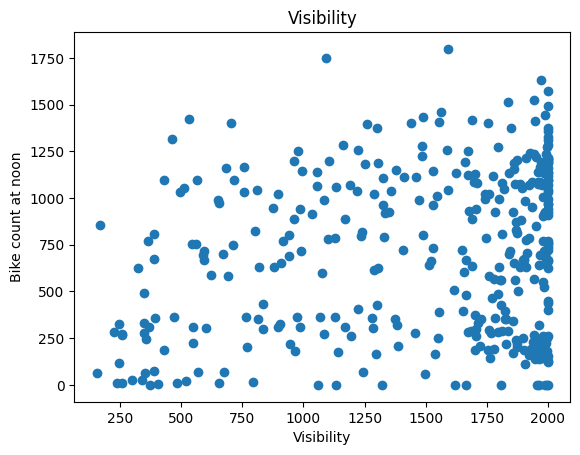

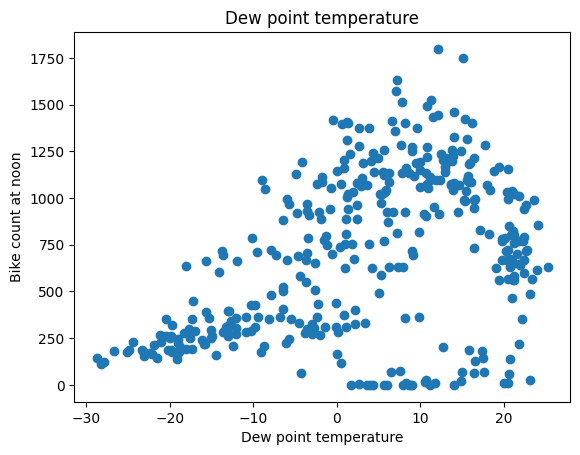

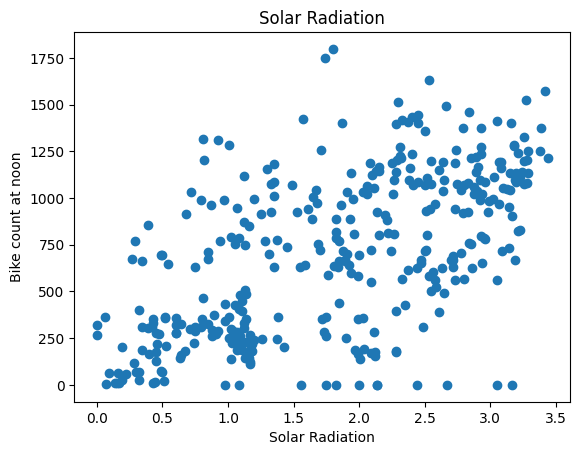

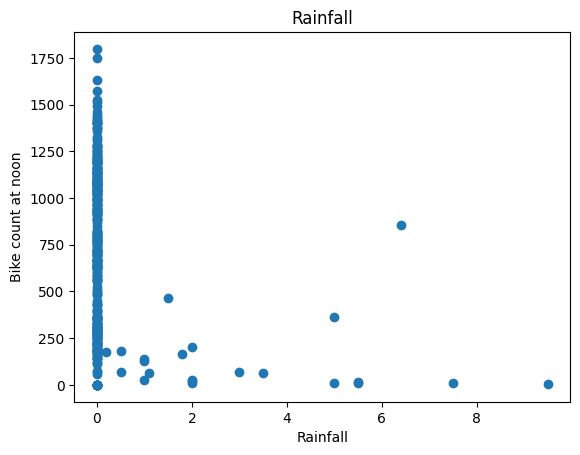

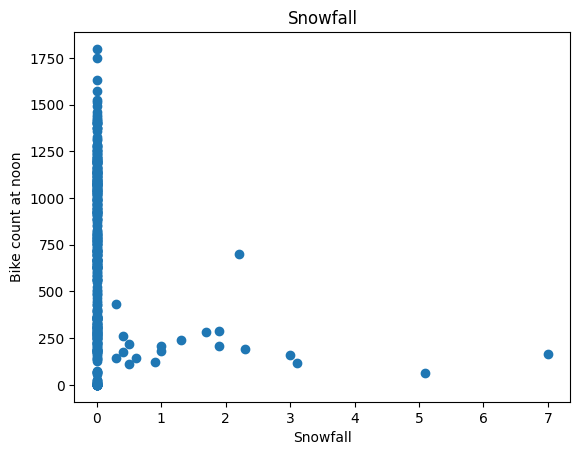

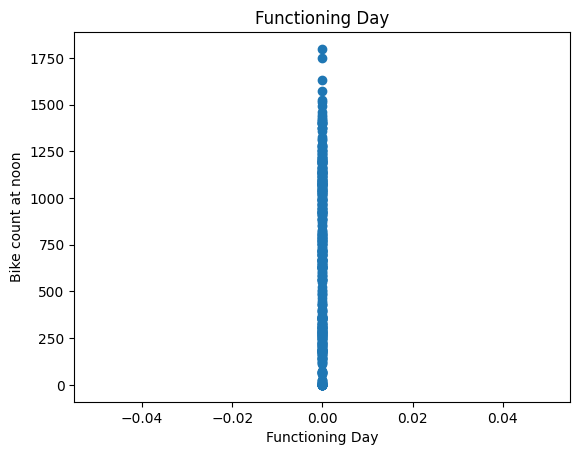

In [8]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["Rented Bike Count"])
  plt.title(label)
  plt.ylabel("Bike count at noon")
  plt.xlabel(label)
  plt.show()

In [13]:
df = df.drop(['Wind speed','Visibility','Functioning Day'],axis=1)

In [14]:
df.head()

,Rented Bike Count,Temperature,Humidity,Dew point temperature,Solar Radiation,Rainfall,Snowfall
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [15]:
train,valid,test =np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

c:\Users\ENVY\OneDrive\Desktop\projects\Bike-sharing-demand\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [31]:
def get_xy(dataframe,y_label,x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
      X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
      if len(x_labels) == 1:
       X = dataframe[x_labels[0]].values.reshape(-1,1)
      else:
        X = dataframe[x_labels].values
    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((X,y))
    
    return data, X,y

In [22]:
print(type(train))
print(type(valid))
print(type(test))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [23]:
_, X_train_temp, y_train_temp = get_xy(train,'Rented Bike Count',x_labels=['Temperature'])
_, X_val_temp, y_val_temp = get_xy(valid,'Rented Bike Count',x_labels=['Temperature'])
_, X_test_temp, y_test_temp = get_xy(test,'Rented Bike Count',x_labels=['Temperature'])

In [24]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
temp_reg.score(X_test_temp,y_test_temp)

0.26907240745034644

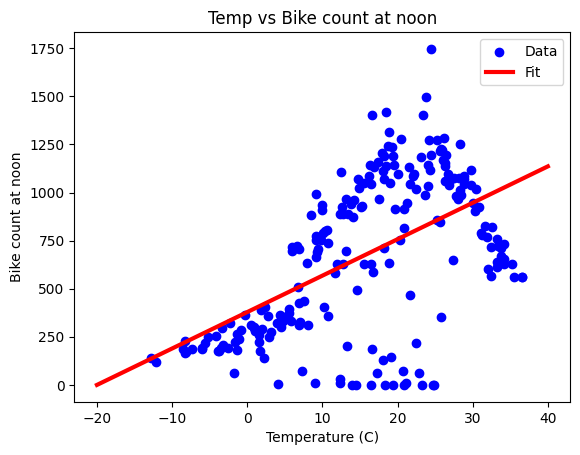

In [28]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color='blue')

# Generate x axis values
x = tf.linspace(-20.0, 40.0, 100).numpy().reshape(-1, 1)

# Predict using your model
y_pred = temp_reg.predict(x)

# Plot fitted curve
plt.plot(x, y_pred, label='Fit', color='red', linewidth=3)

plt.legend()
plt.title('Temp vs Bike count at noon')
plt.ylabel('Bike count at noon')
plt.xlabel('Temperature (C)')
plt.show()


In [29]:
df.columns

Index(['Rented Bike Count', 'Temperature', 'Humidity', 'Dew point temperature',
       'Solar Radiation', 'Rainfall', 'Snowfall'],
      dtype='object')

In [33]:
train,valid,test =np.split(df.sample(frac=1,random_state=42),[int(0.6*len(df)),int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train,'Rented Bike Count',x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(valid,'Rented Bike Count',x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test,'Rented Bike Count',x_labels=df.columns[1:])

c:\Users\ENVY\OneDrive\Desktop\projects\Bike-sharing-demand\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [35]:
all_reg = LinearRegression()
all_reg.fit(X_train_all,y_train_all)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
all_reg.score(X_test_all,y_test_all)

0.46190870435014997